**importing libraries and datasets**


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('adult.data', header = None)
names_data = pd.read_csv('adult.names', sep = ':', skiprows = 1)
test_data = pd.read_csv('adult.test', skiprows = 1, header = None)

**adding column names**

In [3]:
columns = ['age', 'workclass','fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income' ]
df.columns = columns
test_data.columns = columns

**metadata of training dataset**

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.shape

(32561, 15)

In [9]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**testing data metadata**

In [11]:
test_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [12]:
test_data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


**cleaning training dataset**

In [14]:
df['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [15]:
df['occupation'].value_counts()


,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [16]:
df['native-country'].value_counts()


,count
native-country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [17]:
df= df[df['workclass'].str.strip() != '?']


In [18]:
df['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [19]:
df = df[df['occupation'].str.strip() != '?']

In [20]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
Transport-moving,1597
Handlers-cleaners,1370


In [21]:
df = df[df['native-country'].str.strip() != '?']

In [22]:
df['native-country'].value_counts()

,count
native-country,
United-States,27504
Mexico,610
Philippines,188
Germany,128
Puerto-Rico,109
Canada,107
India,100
El-Salvador,100
Cuba,92


In [23]:
df.shape

(30162, 15)

In [24]:
df.drop_duplicates(inplace = True)

In [25]:
df.shape

(30139, 15)

In [26]:
df.drop(['race', 'relationship'], axis = 1, inplace = True)

In [27]:
df['workclass'] = df['workclass'].astype(str).str.strip()
df['education'] = df['education'].astype(str).str.strip()
df['marital-status'] = df['marital-status'].astype(str).str.strip()
df['occupation'] = df['occupation'].astype(str).str.strip()
df['sex'] = df['sex'].astype(str).str.strip()
df['native-country'] = df['native-country'].astype(str).str.strip()

In [28]:
from sklearn.preprocessing import LabelEncoder
le_workclass = LabelEncoder()
le_education = LabelEncoder()
le_marital_status = LabelEncoder()
le_occupation = LabelEncoder()
le_sex = LabelEncoder()
le_native_country = LabelEncoder()
le_income = LabelEncoder()
df['workclass']= le_workclass.fit_transform(df['workclass'])
df['education']= le_education.fit_transform(df['education'])
df['marital-status']= le_marital_status.fit_transform(df['marital-status'])
df['occupation']= le_occupation.fit_transform(df['occupation'])
df['sex']= le_sex.fit_transform(df['sex'])
df['native-country']= le_native_country.fit_transform(df['native-country'])
df['income']= le_income.fit_transform(df['income'])

In [29]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,0,0,0,40,4,0


**cleaning testing dataset**

In [30]:
test_data = test_data.replace(' ?', pd.NA)

In [31]:
test_data.shape

(16281, 15)

In [32]:
test_data.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [33]:
test_data.dropna(inplace = True)

In [34]:
test_data.shape

(15060, 15)

In [35]:
test_data.drop_duplicates(inplace = True)

In [36]:
test_data.drop(['race', 'relationship'], axis = 1, inplace = True)

In [37]:
le_workclass2 = LabelEncoder()
le_education2 = LabelEncoder()
le_marital_status2 = LabelEncoder()
le_occupation2 = LabelEncoder()
le_sex2 = LabelEncoder()
le_native_country2 = LabelEncoder()
le_income2 = LabelEncoder()

In [38]:
test_data['workclass'] = le_workclass2.fit_transform(test_data['workclass'])
test_data['education'] = le_education2.fit_transform(test_data['education'])
test_data['marital-status'] = le_marital_status2.fit_transform(test_data['marital-status'])
test_data['occupation'] = le_occupation2.fit_transform(test_data['occupation'])
test_data['sex'] = le_sex2.fit_transform(test_data['sex'])
test_data['native-country'] = le_native_country2.fit_transform(test_data['native-country'])
test_data['income'] = le_income2.fit_transform(test_data['income'])

In [39]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,0,0,30,37,0


**EDA OF TRAINING DATASET**

<function matplotlib.pyplot.show(close=None, block=None)>

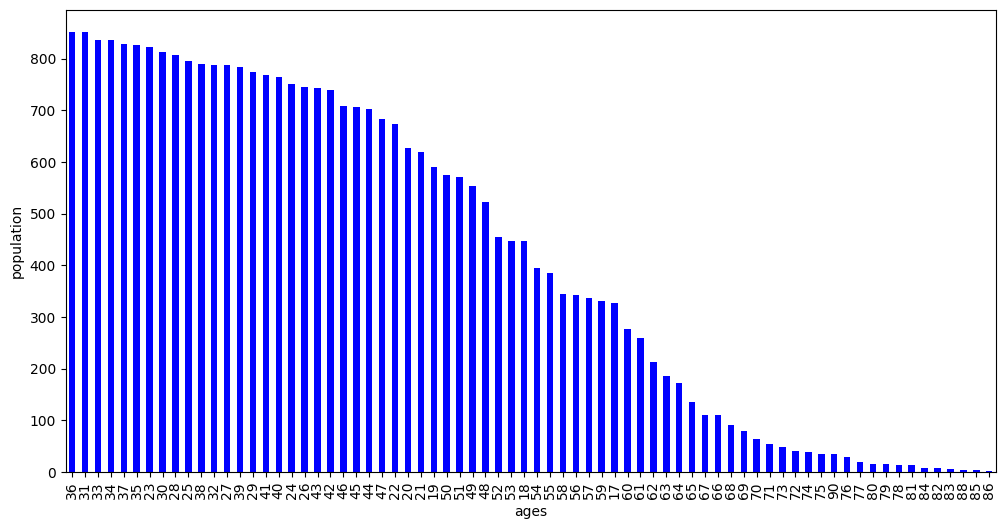

In [40]:
import matplotlib.pyplot as plt
age_data = df['age'].value_counts()
age_data.plot(kind = 'bar', figsize = (12,6), color = 'blue')
plt.xlabel('ages')
plt.ylabel('population')
plt.show

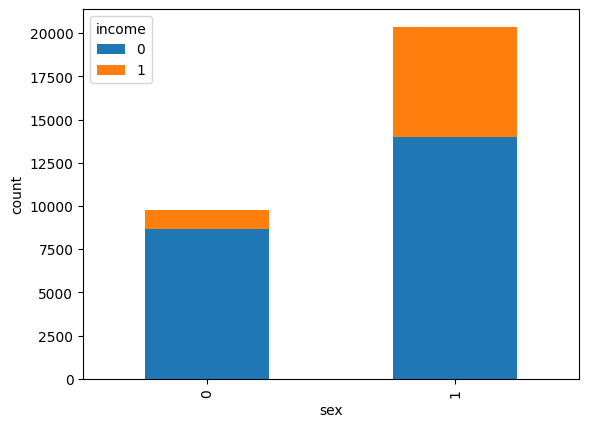

In [41]:
import matplotlib.pyplot as plt
income_distribution = df.groupby(['sex', 'income']).size().unstack()
income_distribution.plot(kind='bar', stacked=True)
plt.xlabel('sex')
plt.ylabel('count')
plt.show()

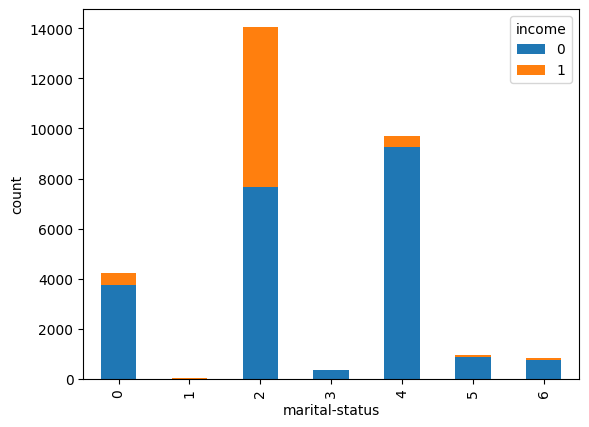

In [42]:
import matplotlib.pyplot as plt
marriage_income_distribution = df.groupby(['marital-status', 'income']).size().unstack()
marriage_income_distribution.plot(kind='bar', stacked=True)
plt.xlabel('marital-status')
plt.ylabel('count')
plt.show()

**RANDOM FOREST CLASSIFIER**

In [43]:
X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
classifier = RandomForestClassifier(n_estimators = 200, random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [45]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy :", accuracy)
print(classification_report(y_test, y_pred))

accuracy : 0.8502158751245433
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11355
           1       0.73      0.61      0.67      3700

    accuracy                           0.85     15055
   macro avg       0.81      0.77      0.79     15055
weighted avg       0.84      0.85      0.85     15055



In [46]:
sample_individual = {'age': 35,'workclass': 'Private','fnlwgt': 234721,'education': 'Bachelors','education_num': 13,'marital-status': 'Married-civ-spouse','occupation': 'Exec-managerial', 'sex': 'Male','capital_gain': 0,'capital_loss': 0,'hours_per_week': 40,'native-country': 'United-States'
}

In [47]:
sample_individual_df = pd.DataFrame([sample_individual])

In [48]:
sample_individual_df['workclass']= le_workclass.transform(sample_individual_df['workclass'])
sample_individual_df['education']= le_education.transform(sample_individual_df['education'])
sample_individual_df['marital-status']= le_marital_status.transform(sample_individual_df['marital-status'])
sample_individual_df['occupation']= le_occupation.transform(sample_individual_df['occupation'])
sample_individual_df['sex']= le_sex.transform(sample_individual_df['sex'])
sample_individual_df['native-country']= le_native_country.transform(sample_individual_df['native-country'])

In [49]:
Prediction = classifier.predict(sample_individual_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [50]:
predicted_income = le_income.inverse_transform(Prediction)
print("Predicted income for this individual is:", predicted_income[0])

Predicted income for this individual is:  >50K


**GRADIENT BOOSTING CLASSIFIER**

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
classifier2 = GradientBoostingClassifier(n_estimators = 200, random_state = 0,learning_rate =0.1, max_depth = 3, subsample = 0.8)
classifier2.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=0, subsample=0.8)

In [52]:
y_pred2 = classifier2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("accuracy :", accuracy)
print(classification_report(y_test, y_pred2))

accuracy : 0.8653603454001992
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11355
           1       0.81      0.59      0.68      3700

    accuracy                           0.87     15055
   macro avg       0.84      0.77      0.80     15055
weighted avg       0.86      0.87      0.86     15055



In [53]:
Prediction2 = classifier2.predict(sample_individual_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [54]:
predicted_income2 = le_income.inverse_transform(Prediction2)
print("Predicted income for this individual is:", predicted_income2[0])

Predicted income for this individual is:  >50K
